<div class="alert alert-block alert-warning">
Correlations can be done on two continuous variables, to determine the relationship between them. A correlation can be between zero and one, and either positive or negative. The larger it is, the more closely related the two variables are.
<br>
<b>Requires:</b><br>
    - 2 <i>continuous</i> variables<br>
</div>

# Acitivy Instructions
> Using the `power_lifting dataset`, you will explore how the different variables are related with each other. Use any means of correlation you like, and correlate any variables you like. Make sure to note anything interesting or unusual that stands out to you, and interpret those correlations.

## Import Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
power_lifting = pd.read_csv('./assets/power_lifting.csv')

In [6]:
power_lifting.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


## Data Exploration

In [10]:
power_lifting.dtypes

MeetID              int64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

> The <b>Wilks coefficient</b> or <b>Wilks formula</b> is a mathematical coefficient that can be used to measure the relative strengths of powerlifters despite the different weight classes of the lifters. Robert Wilks, CEO of Powerlifting Australia, is the author of the formula.
<br><i>Source: [Wikipedia](https://en.wikipedia.org/wiki/Wilks_coefficient)</i>

## Correlation Matrix

### Drop Non-Continuous Variables

Use the `.drop()` function to remove any variables that are *not* continuous. (Can only run Pearson's correlations on continuous variables).

In [11]:
power_lifting1 = power_lifting.drop(['Name', 'Sex', 'Equipment', 'Division', 'WeightClassKg', 'Place'], axis=1)

#### Confirm resulting dataframe:

In [12]:
power_lifting1.head()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
0,0,47.0,59.60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,155.05
1,0,42.0,58.51,NaN,142.88,NaN,95.25,NaN,163.29,401.42,456.38
2,0,42.0,58.51,NaN,142.88,NaN,95.25,NaN,163.29,401.42,456.38
3,0,42.0,58.51,NaN,NaN,NaN,95.25,NaN,NaN,95.25,108.29
4,0,18.0,63.68,NaN,NaN,NaN,31.75,NaN,90.72,122.47,130.47


## Using .corr() on An Entire Dataset

Call the `.corr()` function, and specify `method='pearson'`:

In [14]:
power_lifting1.corr(method='pearson')

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
MeetID,1.000000,-0.049051,-0.001536,0.251026,-0.073974,0.306030,-0.077299,0.249723,-0.057488,0.006375,0.010867
Age,-0.049051,1.000000,0.135278,0.011433,-0.032671,0.082421,0.049477,0.025576,-0.040981,-0.176442,-0.248084
BodyweightKg,-0.001536,0.135278,1.000000,0.145797,0.590903,0.075047,0.584431,0.037715,0.570754,0.405702,0.032777
Squat4Kg,0.251026,0.011433,0.145797,1.000000,0.129793,0.219324,0.180997,0.304282,0.181819,0.164716,0.069333
BestSquatKg,-0.073974,-0.032671,0.590903,0.129793,1.000000,0.096025,0.832890,0.046619,0.841981,0.964607,0.771793
Bench4Kg,0.306030,0.082421,0.075047,0.219324,0.096025,1.000000,0.080598,0.388518,0.124452,0.051416,-0.002724
BestBenchKg,-0.077299,0.049477,0.584431,0.180997,0.832890,0.080598,1.000000,0.091347,0.811797,0.551289,0.255147
Deadlift4Kg,0.249723,0.025576,0.037715,0.304282,0.046619,0.388518,0.091347,1.000000,0.000850,0.062083,0.015495
BestDeadliftKg,-0.057488,-0.040981,0.570754,0.181819,0.841981,0.124452,0.811797,0.000850,1.000000,0.864350,0.615843
TotalKg,0.006375,-0.176442,0.405702,0.164716,0.964607,0.051416,0.551289,0.062083,0.864350,1.000000,0.878689


<mark>Remember that you read only the top right or bottom left of this matrix; everything repeats after the diagonal row of ones.</mark>

## Correlation Matrix using `sns.heatmap()`

Create a correlation matrix easily using the `seaborn` package.
<br>Call the `.corr()` function and use the argument `annot=True` to have the values printed on the plot.

<AxesSubplot:>

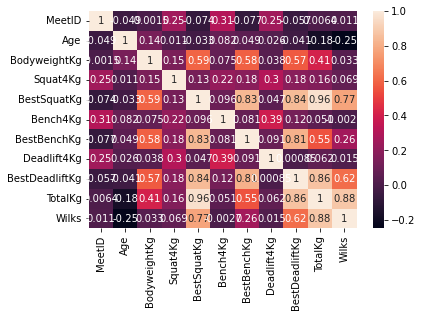

In [15]:
sns.heatmap(power_lifting1.corr(), annot=True)

### More customization

<AxesSubplot:>

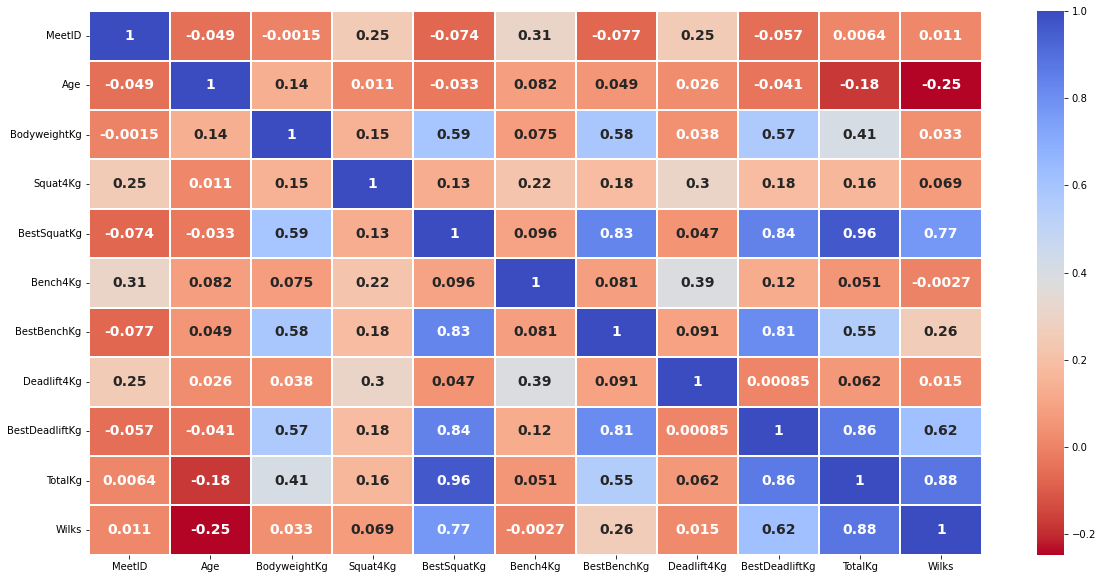

In [33]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(20, 10))

#create heatmap
sns.heatmap(power_lifting1.corr(), annot=True, linewidths=.25, annot_kws={"size":14,"weight": "bold"}, cmap="coolwarm_r")

# `###`